In [1]:
# The magic commands below allow reflecting the changes in an imported module without restarting the kernel.
%load_ext autoreload
%autoreload 2

# We need to add balsam and the modules it depends on to the Python search paths. 
import sys
sys.path.insert(0,'/soft/datascience/Balsam/0.3.5.1/env/lib/python3.6/site-packages/')
sys.path.insert(0,'/soft/datascience/Balsam/0.3.5.1/')

from pprint import pprint
pprint(f'Python search path includes: {sys.path}')

# We also need postgresql to be in the path
import os
os.environ['PATH'] ='/soft/datascience/Balsam/0.3.5.1/env/bin/:' + os.environ['PATH']
os.environ['PATH'] +=':/soft/datascience/PostgreSQL/9.6.12/bin/'

try:
    import balsam
except:
    print('Cannot find balsam, make sure balsam is installed or it is available in Python search paths')    

    # We also need to activate Balsam database by setting the BALSAM_DB_PATH environment variable. 
# This is equivalent to `source balsamactivate jupyter_test` 
os.environ["BALSAM_DB_PATH"]='/lus/theta-fs0/projects/connectomics_aesp/balsam_database/'

("Python search path includes: ['/soft/datascience/Balsam/0.3.5.1/', "
 "'/soft/datascience/Balsam/0.3.5.1/env/lib/python3.6/site-packages/', "
 "'/opt/anaconda3/lib/python36.zip', '/opt/anaconda3/lib/python3.6', "
 "'/opt/anaconda3/lib/python3.6/lib-dynload', '', "
 "'/opt/anaconda3/lib/python3.6/site-packages', "
 "'/opt/anaconda3/lib/python3.6/site-packages/Mako-1.0.7-py3.6.egg', "
 "'/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions', "
 "'/gpfs/mira-home/rvescovi/.ipython']")


In [2]:
def get_database_paths(verbose=True):
    """
    Prints the paths for existing balsam databases
    """
    try:
        from balsam.django_config.db_index import refresh_db_index
        databasepaths = refresh_db_index()
    except:
        databasepaths = None
    if verbose:
        if len(databasepaths) > 0:
            print(f'Found {len(databasepaths)} balsam database location')
            for db in databasepaths:
                print(db)
        else:
            print('No balsam database found')
    return databasepaths

def get_active_database(verbose=True):
    """
    Gets the activate database set in environment variable BALSAM_DB_PATH
    Parameters:
    verbose: Boolean, (True): Prints verbose info (False): No print
    Returns
    -------
    str, path for the active database
    """
    try:
        db = os.environ["BALSAM_DB_PATH"]
        if verbose: print(f'Active balsam database path: {db}')
    except:
        if verbose: print('BALSAM_DB_PATH is not set')
        db = None
    return db
    
def add_app(name, executable, description='', envscript='', preprocess='', postprocess='', checkexe=False):
    """
    Adds a new app to the balsam database.
    """
    from balsam.core.models import ApplicationDefinition as App
    import shutil
    
    if checkexe:
        if shutil.which(executable):        
            print('{} is found'.format(executable))
        else:
            print('{} is not found'.format(executable))
            return newapp
    newapp, created = App.objects.get_or_create(name=name)
    newapp.name        = name
    newapp.executable  = executable
    newapp.description = description
    newapp.envscript   = envscript
    newapp.preprocess  = preprocess
    newapp.postprocess = postprocess
    newapp.save()
    if created: print("Created new app")
    else: print("Updated existing app")
    return newapp

def get_apps(verbose=True):
    """
    Returns all apps as a list
    """
    try:
        from balsam.core.models import ApplicationDefinition as App
        apps = App.objects.all()
    except:
        apps = None
    return apps
        
def get_job():
    from balsam.launcher.dag import BalsamJob
    return BalsamJob()

def add_job(name, workflow, application, description='', args='', num_nodes=1, ranks_per_node=1,cpu_affinity='depth',data={},environ_vars={}):
    from balsam.launcher.dag import BalsamJob
    job                = BalsamJob()
    job.name           = name
    job.workflow       = workflow
    job.application    = application
    job.description    = description
    job.args           = args
    job.num_nodes      = num_nodes
    job.ranks_per_node = ranks_per_node
    job.cpu_affinity   = cpu_affinity
    job.environ_vars   = environ_vars
    job.data           = {}
    job.save()
    
def submit(project='datascience',queue='debug-flat-quad',nodes=1,wall_minutes=30,job_mode='mpi',wf_filter=''):
    """
    Submits a job to the queue with the given parameters.
    Parameters
    ----------
    project: str, name of the project to be charged
    queue: str, queue name, can be: 'default', 'debug-cache-quad', or 'debug-flat-quad'
    nodes: int, Number of nodes, can be any integer from 1 to 4096.
    wall_minutes: int, max wall time in minutes
    job_mode: str, Balsam job mode, can be 'mpi', 'serial'
    wf_filter: str, Selects Balsam jobs that matches the given workflow filter.
    """
    from balsam import setup
    setup()
    from balsam.service import service
    from balsam.core import models
    QueuedLaunch = models.QueuedLaunch
    mylaunch = QueuedLaunch()
    mylaunch.project = project
    mylaunch.queue = queue
    mylaunch.nodes = nodes
    mylaunch.wall_minutes = wall_minutes
    mylaunch.job_mode = job_mode
    mylaunch.wf_filter = wf_filter
    mylaunch.prescheduled_only=False
    mylaunch.save()
    service.submit_qlaunch(mylaunch, verbose=True)

In [3]:
print(os.environ["BALSAM_DB_PATH"])

/lus/theta-fs0/projects/connectomics_aesp/balsam_database/


# APP DATABASE
## No need to edit those. We will keep then up to date.

In [4]:
##TRAKEM2 APPS

##phasing out to be a single function inside the montage job
##can be run on a single stupid node
# add_app(name='trakem2_pre_tiles',
#         executable='python /lus/theta-fs0/projects/connectomics_aesp/software/klab_utils/trakem2/preprocess_tiles.py',
#         description='TRAKEM2 Create Montage script',
#         envscript='/lus/theta-fs0/projects/connectomics_aesp/software/macros_theta/theta_balsam_preamble.sh')


preamble = ''' babababa '''

##need 1 job / node
add_app(name='trakem_montage',
        executable='python /lus/theta-fs0/projects/connectomics_aesp/software/klab_utils/trakem2/mpi_montage.py',
        description='TRAKEM2 MPI montage script',
        envscript='/lus/theta-fs0/projects/connectomics_aesp/software/macros_theta/theta_balsam_preamble.sh')

##can be run on a single stupid node
add_app(name='trakem2_proc_folder',
        executable='python /lus/theta-fs0/projects/connectomics_aesp/software/klab_utils/trakem2/preprocess_stack.py',
        description='TRAKEM2 create pre aligment script',
        envscript='/lus/theta-fs0/projects/connectomics_aesp/software/macros_theta/theta_balsam_preamble.sh')

##need 1 job / node
add_app(name='trakem2_align',
        executable='python /lus/theta-fs0/projects/connectomics_aesp/software/klab_utils/trakem2/align.py',
        description='TRAKEM2 aligment script',
        envscript='/lus/theta-fs0/projects/connectomics_aesp/software/macros_theta/theta_balsam_preamble.sh')

##need 1 job / node
add_app(name='trakem2_export',
        executable='python /lus/theta-fs0/projects/connectomics_aesp/software/klab_utils/trakem2/mpi_export.py',
        description='TRAKEM2 MPI export script',
        envscript='/lus/theta-fs0/projects/connectomics_aesp/software/macros_theta/theta_balsam_preamble.sh')

Created new app
Created new app
Created new app
Created new app


Application 8:
-----------------------
name:                           trakem2_export
description:                    TRAKEM2 MPI export script
executable:                     python /lus/theta-fs0/projects/connectomics_aesp/software/klab_utils/trakem2/mpi_export.py
preprocess:                     
envscript:                      /lus/theta-fs0/projects/connectomics_aesp/software/macros_theta/theta_balsam_preamble.sh
postprocess:                    

In [18]:
##ALIGNTK APPS 

##TODO jobalize the layers bellow

#!/bin/bash
#COBALT -t 180
#COBALT -n 128
#COBALT -q default
#COBALT -A connectomics_aesp

NODES=$COBALT_JOBSIZE
PROC_PER_NODE=64
PROC=$((NODES * PROC_PER_NODE))
#PROC=777

ALIGNTK_DIR=/projects/connectomics_aesp/software/aligntk-1.0.2/install/bin
IMAGE_DIR="../data/images_corr_v2/"
MASK_DIR="../masks_corr_v3/"
OUTPUT_DIR="./outputs_v1"
GROUP_SIZE=$((PROC-1))
N_IMAGES=`ls $IMAGE_DIR | wc -l`
N_GROUPS=$((N_IMAGES / GROUP_SIZE + 1))
#GROUPS=`seq 0 $((N_GROUPS - 1))`

echo "Total image count: $N_IMAGES"
echo "Number of groups: $N_GROUPS"

mkdir -p logs
mkdir -p $MASK_DIR
mkdir -p $OUTPUT_DIR/cmaps
mkdir -p $OUTPUT_DIR/logs
mkdir -p $OUTPUT_DIR/amaps
mkdir -p $OUTPUT_DIR/grids
mkdir -p $OUTPUT_DIR/maps
mkdir -p $OUTPUT_DIR/aligned

def make_schedule:

    fprint "10   1.0  0.1
     9   1.0  0.1
     8   1.0  0.3
     7   1.0  1.0
     7   1.0  2.0
     7   1.0  5.0
     6   1.0  5.0" > schedule.lst

module load miniconda-3.6/conda-4.5.4
source activate ~/workspace/envs/py36


## preprocess
#aligntk_preprocess --image_dir $IMAGE_DIR --output_dir . --group_size $GROUP_SIZE
#aprun -n 777 -N $PROC_PER_NODE python -m klab_utils.aligntk_gen_mask --image_dir $IMAGE_DIR --mask_dir $MASK_DIR --low 10 --high 240 --kernel 10

## find rst
#for (( i=0; i<$N_GROUPS; i++ ))
#do
#  echo "find_rst: $i"
#  START=`date +"%s"`
#  aprun -n $PROC -N $PROC_PER_NODE $ALIGNTK_DIR/find_rst -pairs pairs$i.lst -tif -images $IMAGE_DIR -mask $MASK_DIR -output $OUTPUT_DIR/cmaps/ -rotation -15-15 -max_res 8192 -scale 0.8-1.2 -tx -30-30 -ty -30-30 -summary $OUTPUT_DIR/cmaps/summary$i.out
#	NOW=`date +"%s"`
#	echo $(((NOW - START)/60)) minutes
#done
#
## register
#for (( i=0; i<$N_GROUPS; i++ ))
#do
#  echo "register: $i"
#  START=`date +"%s"`
#  aprun -n $PROC -N $PROC_PER_NODE $ALIGNTK_DIR/register -pairs pairs$i.lst -images $IMAGE_DIR -mask $MASK_DIR -tif -output $OUTPUT_DIR/maps/ -distortion 6.0 -output_level 6 -depth 6 -quality 0.5 -summary $OUTPUT_DIR/maps/summary$i.out -initial_map $OUTPUT_DIR/cmaps/
#	NOW=`date +"%s"`
#	echo $(((NOW - START)/60)) minutes
#done

#echo "register"
#START=`date +"%s"`
#aprun -n $PROC -N $PROC_PER_NODE $ALIGNTK_DIR/register -pairs pairs.lst -images $IMAGE_DIR -mask $MASK_DIR -tif -output $OUTPUT_DIR/maps/ -distortion 4.0 -output_level 6 -depth 6 -quality 0.3 -summary $OUTPUT_DIR/maps/summary.out -initial_map $OUTPUT_DIR/cmaps/
#NOW=`date +"%s"`

## align
#FIXED=`head images.lst -n 1`
echo "align"
START=`date +"%s"`
aprun -n 8192 -N 64 $ALIGNTK_DIR/align -images $IMAGE_DIR -image_list images.lst -map_list pairs.lst -maps $OUTPUT_DIR/maps/ -masks $MASK_DIR -output $OUTPUT_DIR/amaps/ -schedule schedule.lst -incremental -output_grid $OUTPUT_DIR/grids/ -grid_size 8192x8192 -fold_recovery 60
#aprun -n $PROC -N $PROC_PER_NODE $ALIGNTK_DIR/align -images $IMAGE_DIR -image_list images.lst -map_list pairs.lst -masks $MASK_DIR -maps $OUTPUT_DIR/maps/ -output $OUTPUT_DIR/amaps/ -schedule schedule.lst -incremental -output_grid $OUTPUT_DIR/grids/ -grid_size 8192x8192 -fold_recovery 60
NOW=`date +"%s"`
echo $(((NOW - START)/60)) minutes


add_app(name='aligntk_apply_map',
        executable='python -m klab_utils.aligntk_mpi_apply_map',
        description='Distributed FFN training script',
        envscript='/lus/theta-fs0/projects/connectomics_aesp/software/macros_theta/theta_balsam_preamble.sh')


#START=`date +"%s"`
##$ALIGNTK_DIR/apply_map -image_list images.lst -images $IMAGE_DIR -maps $OUTPUT_DIR/amaps/ -output $OUTPUT_DIR/aligned/ -memory 150000
#aprun -n 777 -N 64 python -m klab_utils.aligntk_mpi_apply_map ./outputs_v1/ --image_dir ../data/images_corr_v2/ --image_lst ./images.lst
#
#NOW=`date +"%s"`
#echo $(((NOW - START)/60)) minutes

SyntaxError: invalid syntax (<ipython-input-18-c39239ed6af1>, line 11)

In [20]:
##U-NET APPS

#add_app(name='unet_train')

#add_app(name='unet_infer')

In [21]:
##FLORIN APPS

#add_app(name='florin_')

In [22]:
##CLOUDVOLUME APPS

#add_app(name='cv_create_layer',
## --data_path --layer_type --mags --resolution --offset 

#add_app(name='cv_extract_block')
## --info --mag --offset --volume --file --key

#add_app(name='get_layer_properties')
##--histogram

#add_app(name='classify_objects')


#add_app(name='cv_create_mesh',

#add_app(name='cv_create_skeleton')

In [23]:
##AUTOMO APPS

#add_app(name='automo_preview',

#add_app(name='automo_center',

#add_app(name='automo_search_center',

#add_app(name='automo_recon',

#add_app(name='automo_preview_recon')



In [103]:
#add_app(name='ffn_build_coordinates',

#add_app(name='ffn_potato2',


add_app(name='ffn_trainer',
        executable='python /lus/theta-fs0/projects/connectomics_aesp/software/ffn/train_hvd.py',
        description='Distributed FFN training script',
        envscript='/lus/theta-fs0/projects/connectomics_aesp/software/macros_theta/theta_balsam_preamble.sh')

add_app(name='ffn_inference2',
        executable='python /lus/theta-fs0/projects/connectomics_aesp/ffn/run_inference.py',
        description='FFN inference script',
        envscript='/lus/theta-fs0/projects/connectomics_aesp/balsam/training_env.sh')

Updated existing app
Created new app


Application 9:
-----------------------
name:                           ffn_inference2
description:                    FFN inference script
executable:                     python /lus/theta-fs0/projects/connectomics_aesp/ffn/run_inference.py
preprocess:                     
envscript:                      /lus/theta-fs0/projects/connectomics_aesp/balsam/training_env.sh
postprocess:                    

# TRAKEM2 PREAMBLE AND JOBS

In [ ]:

RAW_INPUT=./trakem2_HL00732
PROCESS_FOLDER=./trakem2_HL00732_process_3
MIN=1024
MAX=2048
RANGE=100


python $PRE_TILES $RAW_INPUT $PROCESS_FOLDER/align_raw.txt 

def sem_montage_job(workflow_name, folders):
    for kfolder in folders:
        
        montage_args = ''
        montage_args += f' $PROCESS_FOLDER/align_raw.txt '
        montage_args += f' $PROCESS_FOLDER '
        montage_args += f' --min $MIN '
        montage_args += f' --max $MAX '
        montage_args += f' --fiji $FIJI '
        print(montage_args)

        add_job(name=f'montage',
            workflow=workflow_name,
            data={folder}
            application='trakem2_montage',
            args=montage_args,
            ranks_per_node=1,
            environ_vars='OMP_NUM_THREADS=32')





# python $PRE_STACK $PROCESS_FOLDER/output $PROCESS_FOLDER/align_new.txt #input #output

#SERIAL SINGLE NODE OPERATION!!!
# $SUBMIT_THETA python $ALIGN $PROCESS_FOLDER/align_new.txt $PROCESS_FOLDER/align1 --fiji $FIJI

#$SUBMIT_THETA python $EXPORT $PROCESS_FOLDER/align_new.txt $PROCESS_FOLDER/align1 --range $RANGE --fiji $FIJI
sleep 1


add_job(name='test_train',workflow='ffn_training',application='trainer',args=myargs)

    


# FLOOD FILL NETWORK PREAMBLE AND JOBS

In [39]:
import sys
sys.path.insert(0,'/gpfs/mira-home/keceli/ffn/keceli_ffn/')
sys.path.insert(0,'/lus/theta-fs0/projects/connectomics_aesp/keceli/pip_ffn/')
sys.path.insert(0,'/soft/datascience/tensorflow/tf1.13/')

from ffn.utils import bounding_box
from ffn.utils import geom_utils

def create_inference_config(pars, file_name):
    request_par = ('''image {
                  hdf5: "%s:%s"
                }
                image_mean: %s
                image_stddev: %s
                checkpoint_interval: 1800
                seed_policy: "PolicyPeaks"
                model_checkpoint_path: "%s"
                model_name: "convstack_3d.ConvStack3DFFNModel"
                model_args: "{\\"depth\\": 2, \\"fov_size\\": [5,5,5], \\"deltas\\": [1, 1, 1]}"
                segmentation_output_dir: "%s"
                inference_options {
                  init_activation: 0.9
                  pad_value: 0.05
                  move_threshold: 0.1
                  min_boundary_dist { x: 1 y: 1 z: 1}
                  segment_threshold: 0.08
                  min_segment_size: 10
                }''') % pars
    print (request_par)

def divide_bounding_box(bbox, subvolume_size, overlap):
    """
    Returns a list of bounding boxes that divides the given bounding box into subvolumes.
    Parameters
    ----------
    bbox: BoundingBox object,
    subvolume_size: list or tuple
    overlap: list or tuple
    """
    start = geom_utils.ToNumpy3Vector(bbox.start)
    size = geom_utils.ToNumpy3Vector(bbox.size)
    bbox = bounding_box.BoundingBox(start, size)
    calc = bounding_box.OrderlyOverlappingCalculator(outer_box=bbox, 
                                                    sub_box_size=subvolume_size, 
                                                    overlap=overlap, 
                                                    include_small_sub_boxes=True,
                                                    back_shift_small_sub_boxes=False)
    return [bb for bb in calc.generate_sub_boxes()]

def check_balsam_jobs(bbox, config_file):
    for i,box in enumerate(boxes):
        start = box.start
        size  = box.size
        print(f" --bounding_box 'start {{ x:{start[0]} y:{start[1]} z:{start[2]} }} size {{ x:{size[0]} y:{size[1]} z:{size[2]} }}' ")
    print(f" --inference_request=\"$(cat "+config_file+")\" ")


def generate_balsam_inference_jobs(bbox_list, config_file, workflow_name='ffn_sub_inference'):
    for i,box in enumerate(bbox_list):
        start = box.start
        size  = box.size
        inference_args  = f" --inference_request=\"$(cat "+config_file+")\" "
        inference_args += f" --bounding_box 'start {{ x:{start[0]} y:{start[1]} z:{start[2]} }} size {{ x:{size[0]} y:{size[1]} z:{size[2]} }}' "
        add_job(name=f'sub_inference_{i}',
                workflow=workflow_name,
                application='inference2',
                args=inference_args,
                ranks_per_node=1,
                environ_vars='OMP_NUM_THREADS=32')

# Flood Fill Network Training Job

In [40]:
import time
TFRECORDFILE='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/tf_record_file'
GROUNDTRUTH='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/groundtruth.h5'
GRAYSCALE='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/grayscale_maps.h5'
BATCHSIZE=1
OPTIMIZER='adam'
TIMESTAMP=time.strftime("%y%m%d%H%M%S")
TRAINDIR=f'train_b{BATCHSIZE}_o{OPTIMIZER}_{TIMESTAMP}'

myargs = ''
myargs += f' --train_coords {TFRECORDFILE} '
myargs += f' --data_volumes valdation1:{GRAYSCALE}:raw '
myargs += f' --label_volumes valdation1:{GROUNDTRUTH}:stack '
myargs += f' --model_name convstack_3d.ConvStack3DFFNModel '
myargs += ''' --model_args "{\\"depth\\": 12, \\"fov_size\\": [33, 33, 33], \\"deltas\\": [8, 8, 8]}"'''
myargs += ' --image_mean 128 --image_stddev 33 '
myargs += ' --max_steps 400 --summary_rate_secs 60 ' 
myargs += f' --batch_size {BATCHSIZE} '
myargs += f' --optimizer {OPTIMIZER} '
myargs += ' --num_intra_threads 64 --num_inter_threads 1 '
myargs += f' --train_dir {TRAINDIR} '
print(myargs)

add_job(name='test_train',workflow='ffn_training',application='trainer',args=myargs)

 --train_coords /lus/theta-fs0/projects/datascience/keceli/run/f3n/training/tf_record_file  --data_volumes valdation1:/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/grayscale_maps.h5:raw  --label_volumes valdation1:/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/groundtruth.h5:stack  --model_name convstack_3d.ConvStack3DFFNModel  --model_args "{\"depth\": 12, \"fov_size\": [33, 33, 33], \"deltas\": [8, 8, 8]}" --image_mean 128 --image_stddev 33  --max_steps 400 --summary_rate_secs 60  --batch_size 1  --optimizer adam  --num_intra_threads 64 --num_inter_threads 1  --train_dir train_b1_oadam_191001210138 


# Flood Fill Network Inference Job

In [104]:
# Add inference jobs for each subvolume


INPUT_FILE = 'input_file_parallel.h5'
INPUT_DSET = 'image'
OUTPUT_FILE = 'output_file_parallel.h5'
OUTPUT_DSET = 'image'
OUTPUT_PATH = 'results_test_parallel6'
MEAN = 100
STD = 30
MODEL_PATH = 'model_vessel/model.ckpt-1680104'
DEPTH = 2
START = (0,0,0)
SIZE = (1000,1000,1000)
CHUNK_SIZE = (256,256,256)
OVERLAP = (16,16,16)

bbox = bounding_box.BoundingBox(start=START,size=SIZE)
pars =  (INPUT_FILE,INPUT_DSET, MEAN, STD, MODEL_PATH, OUTPUT_PATH)

test = create_inference_config(pars, 'test')
config_file = '/lus/theta-fs0/projects/connectomics_aesp/ravescovi/ffn_vessels_overlay_sean_anno/wholebrain.pbtxt'

boxes = divide_bounding_box(bbox,subvolume_size=CHUNK_SIZE,overlap=OVERLAP)
print(f'Number of subvolumes: {len(boxes)}')

generate_balsam_inference_jobs(boxes, config_file, workflow_name='inference_8_8_v8')


image {
                  hdf5: "input_file_parallel.h5:image"
                }
                image_mean: 100
                image_stddev: 30
                checkpoint_interval: 1800
                seed_policy: "PolicyPeaks"
                model_checkpoint_path: "model_vessel/model.ckpt-1680104"
                model_name: "convstack_3d.ConvStack3DFFNModel"
                model_args: "{\"depth\": 2, \"fov_size\": [5,5,5], \"deltas\": [1, 1, 1]}"
                segmentation_output_dir: "results_test_parallel6"
                inference_options {
                  init_activation: 0.9
                  pad_value: 0.05
                  move_threshold: 0.1
                  min_boundary_dist { x: 1 y: 1 z: 1}
                  segment_threshold: 0.08
                  min_segment_size: 10
                }
Number of subvolumes: 125


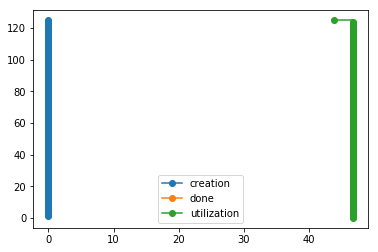

In [106]:
# Balsam metadata
from balsam.core.models import utilization_report, throughput_report, process_job_times, BalsamJob
from matplotlib import pyplot as plt
%matplotlib inline

workflow = "inference_8_8_v8"

##useful shit
query = BalsamJob.objects.filter(workflow=workflow)
time_dat = process_job_times(query) #filters into a single workflow
[j.runtime_seconds for j in query] # full time per balsam Job

times_created, num_created = sorted(time_dat['CREATED']), range(1, len(time_dat["CREATED"])+1)

t0 = min(times_created)

def mins(t):
    return (t-t0).total_seconds() / 60

plt.step([mins(t) for t in times_created] ,num_created, 'o', where='post',label='creation')
times, num_thru = throughput_report(time_dat)
plt.step([mins(t) for t in times], num_thru,  'o', where='post', label='done')

times_u, num_util = utilization_report(time_dat)
plt.step([mins(t) for t in times_u], num_util, 'o', where='post', label='utilization')
plt.legend()

# Flood Fill Network MultScale Training Job

In [ ]:
#multiscale training job
TFRECORDFILE='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/tf_record_file'
GROUNDTRUTH='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/groundtruth.h5'
GRAYSCALE='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/grayscale_maps.h5'
BATCHSIZE=1
OPTIMIZER='adam'

MAGS = [1,2,4,8,16]

for mag in MAGS:
    
    
for mag in MAGS:    
    TRAINDIR=f'train_b{BATCHSIZE}_o{OPTIMIZER}_m{mag}_{TIMESTAMP}'
    myargs = ''
    myargs += f' --train_coords {TFRECORDFILE} '
    myargs += f' --data_volumes valdation1:{GRAYSCALE}:raw '
    myargs += f' --label_volumes valdation1:{GROUNDTRUTH}:stack '
    myargs += f' --model_name convstack_3d.ConvStack3DFFNModel '
    myargs += ''' --model_args "{\\"depth\\": 12, \\"fov_size\\": [33, 33, 33], \\"deltas\\": [8, 8, 8]}"'''
    myargs += ' --image_mean 128 --image_stddev 33 '
    myargs += ' --max_steps 40000000 --summary_rate_secs 360 ' 
    myargs += f' --batch_size {BATCHSIZE} '
    myargs += f' --optimizer {OPTIMIZER} '
    myargs += ' --num_intra_threads 64 --num_inter_threads 1 '
    myargs += f' --train_dir {TRAINDIR} '

    add_job(name=f'train_mag{mag}',
            workflow='ffn_training',
            application='trainer',
            args=myargs,
            ranks_per_node=rpn,
            num_nodes=nnode,
            environ_vars={'OMP_NUM_THREADS=64'})

# Scratch Space Bellow

In [5]:
# Adding a training job to the database
import time
TFRECORDFILE='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/tf_record_file'
GROUNDTRUTH='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/groundtruth.h5'
GRAYSCALE='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/grayscale_maps.h5'
BATCHSIZE=1
OPTIMIZER='adam'
TIMESTAMP=time.strftime("%y%m%d%H%M%S")
for rpn in [1,4,16]:
    for nnode in [1,4,16,64]:
        TRAINDIR=f'train_b{BATCHSIZE}_o{OPTIMIZER}_n{nnode}_r{rpn}_{TIMESTAMP}'
        myargs = ''
        myargs += f' --train_coords {TFRECORDFILE} '
        myargs += f' --data_volumes valdation1:{GRAYSCALE}:raw '
        myargs += f' --label_volumes valdation1:{GROUNDTRUTH}:stack '
        myargs += f' --model_name convstack_3d.ConvStack3DFFNModel '
        myargs += ''' --model_args "{\\"depth\\": 12, \\"fov_size\\": [33, 33, 33], \\"deltas\\": [8, 8, 8]}"'''
        myargs += ' --image_mean 128 --image_stddev 33 '
        myargs += ' --max_steps 40000000 --summary_rate_secs 360 ' 
        myargs += f' --batch_size {BATCHSIZE} '
        myargs += f' --optimizer {OPTIMIZER} '
        myargs += ' --num_intra_threads 64 --num_inter_threads 1 '
        myargs += f' --train_dir {TRAINDIR} '

        add_job(name=f'train_n{nnode}_r{rpn}',
                workflow='ffn_training',
                application='trainer',
                args=myargs,
                ranks_per_node=rpn,
                num_nodes=nnode,
                environ_vars={'OMP_NUM_THREADS=64'})

In [105]:
# If you see 'Submit OK:', Job submission is succesful.
submit(project='SDL_workshop',
       queue='training',
       nodes=128,
       wall_minutes=40,
       wf_filter='inference_8_8_v8')

# submit(project='connectomics_aesp',
#        queue='default',
#        job_mode='serial',
#        nodes=128,
#        wall_minutes=180,
#        wf_filter='inference_8_8')

# submit(project='connectomics_aesp',
#        queue='debug-flat-quad',
#        nodes=3,
#        wall_minutes=59,
#        wf_filter='ffn_sub_inference')

# submit(project='connectomics_aesp',
#        queue='default',
#        nodes=256,
#        wall_minutes=359,
#        wf_filter='ffn_training')

Submit OK: Qlaunch {   'command': '/lus/theta-fs0/projects/connectomics_aesp/balsam_database/qsubmit/qlaunch51.sh',
    'from_balsam': True,
    'id': 51,
    'job_mode': 'mpi',
    'nodes': 128,
    'prescheduled_only': False,
    'project': 'SDL_workshop',
    'queue': 'training',
    'scheduler_id': 374843,
    'state': 'submitted',
    'wall_minutes': 40,
    'wf_filter': 'inference_8_8_v8'}
